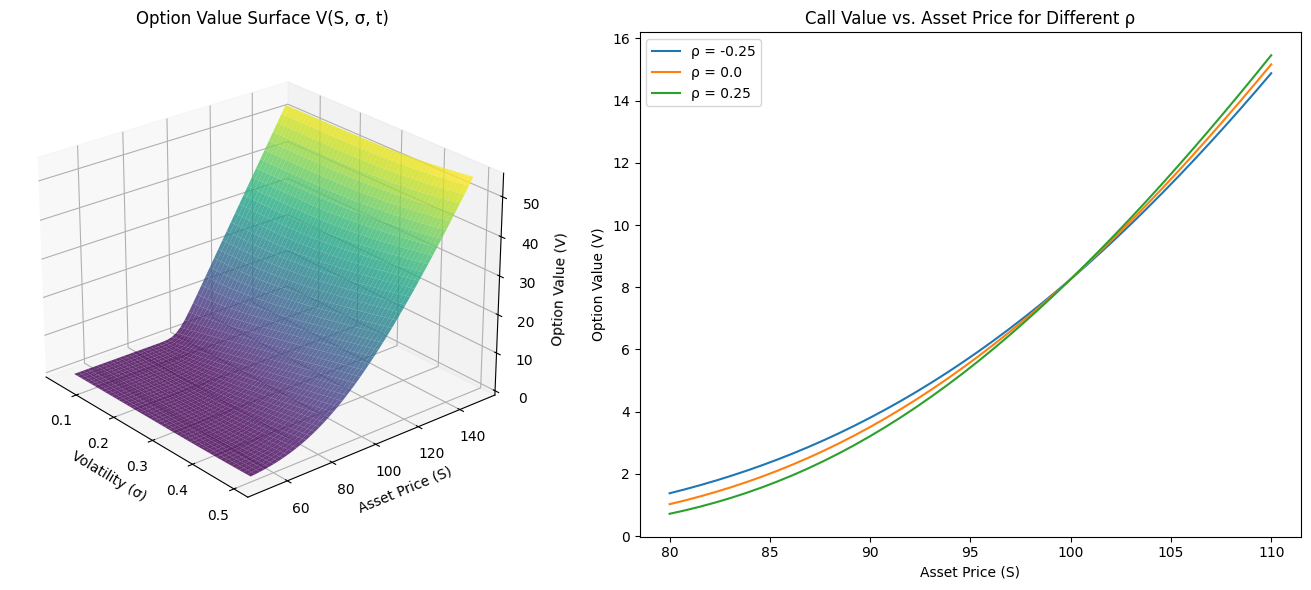

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    """
    Compute the Black-Scholes call option price.
    
    Parameters:
      S     : Current asset price
      K     : Strike price
      T     : Time to maturity (in years)
      r     : Risk-free interest rate
      sigma : Volatility
      
    Returns:
      Call option value.
    """
    if T <= 0:
        return max(S - K, 0.0)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Option and market parameters:
K = 100.0      # Strike price
T = 0.5        # Time to maturity (half a year)
r = 0.05       # Risk-free interest rate
mu = 0.1       # Drift of the asset price (informative only)
rho = -0.5     # Base correlation (informative only)

# --- Left Plot: 3D Surface of V(S,σ,t) ---
# Define ranges for volatility σ and asset price S:
sigma_vals = np.linspace(0.05, 0.5, 50)  # Volatility range (will be x-axis)
S_vals     = np.linspace(50, 150, 50)      # Asset price range (will be y-axis)

# Create a meshgrid for volatility and asset price (swapped order):
sigma_mesh, S_mesh = np.meshgrid(sigma_vals, S_vals)

# Compute the option price V over the (σ, S) grid:
V = np.zeros_like(sigma_mesh)
for i in range(sigma_mesh.shape[0]):
    for j in range(sigma_mesh.shape[1]):
        V[i, j] = black_scholes_call(S_mesh[i, j], K, T, r, sigma_mesh[i, j])

# --- Right Plot: Correlation Plot (Different ρ values) ---
# Here, effective volatility is adjusted as:
#   sigma_eff = base_sigma + rho * corr_factor * ((S - K)/K)
correlations = [-0.25, 0.0, 0.25]   # Different ρ values to explore
S_line = np.linspace(80, 110, 40)     # Asset price range for the line plots
base_sigma = 0.25                   # Base volatility for the toy model
corr_factor = 0.5                   # Scaling factor for the correlation effect

lines_data = {}
for rho_val in correlations:
    call_vals = []
    for S_ in S_line:
        sigma_eff = base_sigma + rho_val * corr_factor * ((S_ - K) / K)
        if sigma_eff < 0.01:
            sigma_eff = 0.01  # Ensure volatility is positive
        c_val = black_scholes_call(S_, K, T, r, sigma_eff)
        call_vals.append(c_val)
    lines_data[rho_val] = call_vals

fig = plt.figure(figsize=(14, 6))

# --- Left subplot: 3D Surface ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# x-axis: volatility σ, y-axis: asset price S, z-axis: option value V
surf = ax1.plot_surface(sigma_mesh, S_mesh, V, cmap='viridis', edgecolor='none', alpha=0.8)
ax1.set_xlabel('Volatility (σ)')
ax1.set_ylabel('Asset Price (S)')
ax1.set_zlabel('Option Value (V)')
ax1.set_title('Option Value Surface V(S, σ, t)')
ax1.view_init(elev=25, azim=-40)

# --- Right subplot: Correlation Plot (Effect of ρ) ---
ax2 = fig.add_subplot(1, 2, 2)
for rho_val in correlations:
    ax2.plot(S_line, lines_data[rho_val], label=f'ρ = {rho_val}')
ax2.set_xlabel('Asset Price (S)')
ax2.set_ylabel('Option Value (V)')
ax2.set_title('Call Value vs. Asset Price for Different ρ')
ax2.legend()

plt.tight_layout()
plt.show()